In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%store -r BZGB

SAPGB = pd.read_excel(r"C:\Users\anton_zpf58tt\OneDrive\Documents\Glasgow\Year 4\ENG4110P Individual Project 4\Code\UK-Electricity-Pricing-Solutions\SAP_GB_20180101-20230122.xlsx", sheet_name='System Average Price')

SAPGBdata = pd.DataFrame({"SAP Actual Day|GB": SAPGB.iloc[1097:1827,1]})
SAPGBdata["Date"] = pd.date_range(start="1/1/2021", periods=730, freq="D")

NewOrder = ["Date", "SAP Actual Day|GB"]

SAPGBdata = SAPGBdata.reindex(columns=NewOrder)

SAPGBdata = SAPGBdata.reset_index()
del SAPGBdata['index']

SAPGBdata

,Date,SAP Actual Day|GB
0,2021-01-01,1.9499
1,2021-01-02,1.9578
2,2021-01-03,1.9439
3,2021-01-04,2.0391
4,2021-01-05,1.8698
...,...,...
725,2022-12-27,6.4625
726,2022-12-28,5.8369
727,2022-12-29,5.7103
728,2022-12-30,5.8352


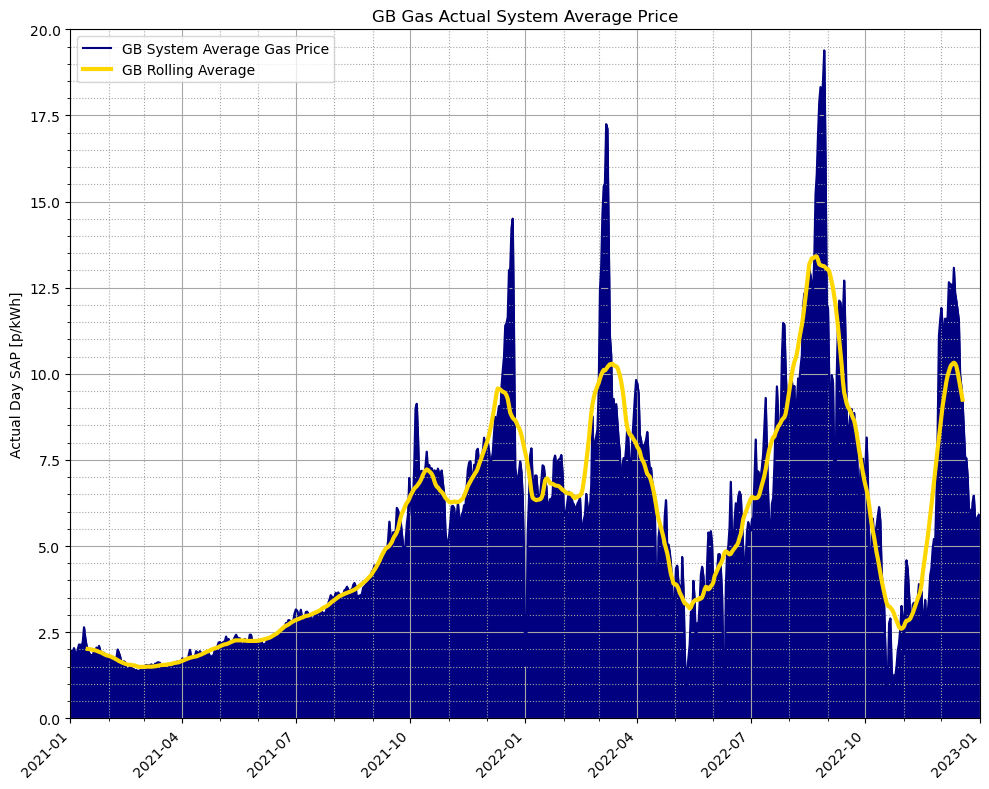

(18628.0, 19358.0)


In [57]:
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)

plt.title('GB Gas Actual System Average Price')
plt.ylabel('Actual Day SAP [p/kWh]')

ax.plot(SAPGBdata["Date"], SAPGBdata["SAP Actual Day|GB"], color = "navy", label="GB System Average Gas Price")
ax.plot(SAPGBdata["Date"], SAPGBdata["SAP Actual Day|GB"].rolling(28,  center=True).mean(), linewidth=3, color = "gold", label="GB Rolling Average")
plt.fill_between(SAPGBdata["Date"], SAPGBdata["SAP Actual Day|GB"].astype(float), color="navy")

plt.legend()
plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

fig.autofmt_xdate()

plt.tick_params(axis='x', which='major', labelsize=10)
plt.xticks(rotation=45, ha='right')
plt.xlim(18628, 19358)
plt.ylim(0, 20)
plt.tight_layout()

ax.xaxis.set_minor_locator(mdates.MonthLocator())
ax.xaxis.set_minor_formatter(mdates.DateFormatter(""))

plt.show()
print(ax.get_xlim())

In [58]:
%store -r BZGB

EURGBP = pd.read_csv(r"C:\Users\anton_zpf58tt\OneDrive\Documents\Glasgow\Year 4\ENG4110P Individual Project 4\Code\UK-Electricity-Pricing-Solutions\EUR_GBP.csv")

Forex = pd.DataFrame({'Date': pd.date_range(start="1/1/2021", periods=730, freq="D"),
    'GBP/EUR': EURGBP.iloc[5963:6693,1]})

Forex = pd.DataFrame(Forex)
Forex = Forex.reset_index()
del Forex['index']

CompGasGB = SAPGBdata
CompGasGB = CompGasGB.rename(columns={"SAP Actual Day|GB": "GB Gas SAP [p/kWh]"})

CompGasGB["GB Gas SAP [GBP/MWh]"] = (CompGasGB["GB Gas SAP [p/kWh]"]/100*1000)
CompGasGB["GB Gas SAP [EUR/MWh]"] = (CompGasGB["GB Gas SAP [GBP/MWh]"]/Forex["GBP/EUR"]).astype(float)

CompGasGB["GB Electricity DA [EUR/MWh]"] = BZGB["BZN|GB"].astype(float)

del CompGasGB["GB Gas SAP [p/kWh]"]
del CompGasGB["GB Gas SAP [GBP/MWh]"]


print(CompGasGB)
print(CompGasGB.dtypes)

          Date  GB Gas SAP [EUR/MWh]  GB Electricity DA [EUR/MWh]
0   2021-01-01             21.688931                        68.40
1   2021-01-02             21.776804                        71.54
2   2021-01-03             21.622193                        65.27
3   2021-01-04             22.616460                        67.32
4   2021-01-05             20.698969                        67.40
..         ...                   ...                          ...
725 2022-12-27             73.160653                       151.40
726 2022-12-28             66.284721                       119.47
727 2022-12-29             64.487459                        52.51
728 2022-12-30             65.790987                        92.39
729 2022-12-31             66.626453                       147.39

[730 rows x 3 columns]
Date                           datetime64[ns]
GB Gas SAP [EUR/MWh]                  float64
GB Electricity DA [EUR/MWh]           float64
dtype: object


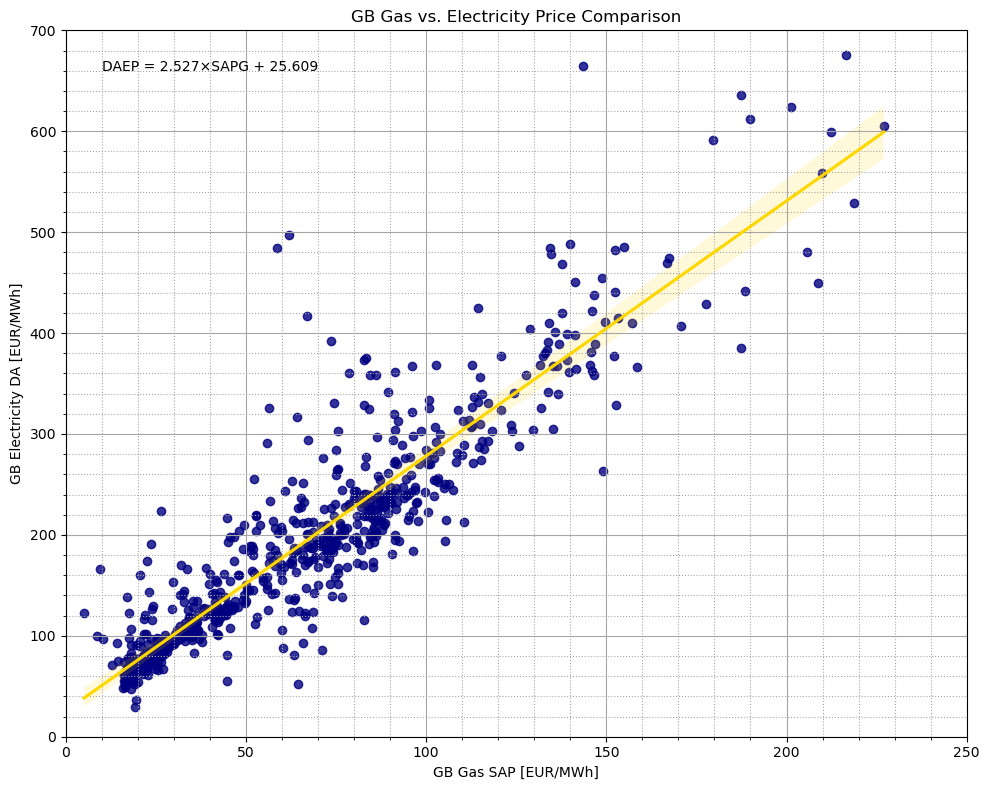

In [59]:
from matplotlib.ticker import MultipleLocator
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import seaborn as sns
import scipy


fig, ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(10)

plt.title('GB Gas vs. Electricity Price Comparison')
plt.xlabel('Gas SAP [EUR/MWh]')
plt.ylabel('Electricity DA Price [EUR/MWh]')

sns.regplot(x=CompGasGB["GB Gas SAP [EUR/MWh]"], 
            y=CompGasGB["GB Electricity DA [EUR/MWh]"], 
            scatter = True, ci = 100, fit_reg = True,
            scatter_kws = {"color": "navy"}, line_kws = {"color": "gold"})

slope, intercept, r, CompGasGB, sterr = scipy.stats.linregress(x=CompGasGB["GB Gas SAP [EUR/MWh]"],
                                                       y=CompGasGB["GB Electricity DA [EUR/MWh]"])

plt.text(10, 660, 'DAEP = ' + str(round(slope,3)) + '×SAPG + ' + str(round(intercept,3)))

plt.grid(visible=True, which='major', color='0.65', linestyle='-')
plt.grid(visible=True, which='minor', color='0.65', linestyle=':')

ax.yaxis.get_ticklocs(minor=True)
ax.minorticks_on()

#plt.tick_params(axis='x', which='major', labelsize=10)
#plt.xticks(rotation=45, ha='right')
plt.xlim(0, 250)
plt.ylim(0, 700)
plt.tight_layout()

plt.show()